## World Population Analysis

Data source: UN, World Population Prospects (2024) – processed by Our World in Data. 
United Nations, “World Population Prospects” [original data].

### 📚 Importing Libraries and Dataset

In [4]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/population-by-age-group.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/population-by-age-group.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

## 🎯 Setting the objective


The objective is to explore the dataset on world population and solve for CAGR, Compounded Annual Growth Rate. 

## 📈 Workflow 

* Data Loading and Preprocessing: Load the dataset and preprocess the dataset for analysis. This includes handling missing values if any.
* Exploratory Data Analysis: Explore the data to gain insights and understand the relationships of the variables if any.
* Analysis: Present the analysis of the variables.
* Recommendations: Based on the findings, make recommendations. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Entity                                              18944 non-null  object
 1   Code                                                17612 non-null  object
 2   Year                                                18944 non-null  int64 
 3   population__sex_all__age_65plus__variant_estimates  18944 non-null  int64 
 4   population__sex_all__age_25_64__variant_estimates   18944 non-null  int64 
 5   population__sex_all__age_15_24__variant_estimates   18944 non-null  int64 
 6   population__sex_all__age_5_14__variant_estimates    18944 non-null  int64 
 7   population__sex_all__age_0_4__variant_estimates     18944 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


In [10]:
df.head(10)

,Entity,Code,Year,population__sex_all__age_65plus__variant_estimates,population__sex_all__age_25_64__variant_estimates,population__sex_all__age_15_24__variant_estimates,population__sex_all__age_5_14__variant_estimates,population__sex_all__age_0_4__variant_estimates
0,Afghanistan,AFG,1950,221568,2881732,1481160,1891644,1300029
1,Afghanistan,AFG,1951,225314,2914311,1503391,1931419,1304860
2,Afghanistan,AFG,1952,228844,2948420,1526373,1971716,1312384
3,Afghanistan,AFG,1953,232091,2982312,1548878,2008836,1324539
4,Afghanistan,AFG,1954,235121,3016433,1570530,2043243,1342583
5,Afghanistan,AFG,1955,238196,3052562,1592237,2075109,1368829
6,Afghanistan,AFG,1956,241405,3090800,1614737,2105985,1401338
7,Afghanistan,AFG,1957,244764,3130706,1638719,2139274,1434831
8,Afghanistan,AFG,1958,248065,3170308,1663882,2172705,1468406
9,Afghanistan,AFG,1959,251420,3213263,1692643,2207814,1504085


## Exploratory Data Analysis

### Renaming Columns

In [13]:
df.columns

Index(['Entity', 'Code', 'Year',
       'population__sex_all__age_65plus__variant_estimates',
       'population__sex_all__age_25_64__variant_estimates',
       'population__sex_all__age_15_24__variant_estimates',
       'population__sex_all__age_5_14__variant_estimates',
       'population__sex_all__age_0_4__variant_estimates'],
      dtype='object')

In [14]:
df.rename(columns={'population__sex_all__age_65plus__variant_estimates': 'age_65_above', 
                         'population__sex_all__age_25_64__variant_estimates': 'age_25_64',
                         'population__sex_all__age_15_24__variant_estimates': 'age_15_24',
                         'population__sex_all__age_5_14__variant_estimates': 'age_5_14',
                         'population__sex_all__age_0_4__variant_estimates': 'age_0_4'}, inplace=True
               )

In [15]:
df.columns

Index(['Entity', 'Code', 'Year', 'age_65_above', 'age_25_64', 'age_15_24',
       'age_5_14', 'age_0_4'],
      dtype='object')

### Checking for Missing Values

In [17]:
df.isna().sum()

Entity             0
Code            1332
Year               0
age_65_above       0
age_25_64          0
age_15_24          0
age_5_14           0
age_0_4            0
dtype: int64

In [18]:
(1332/18944)*100

7.03125

The missing values in the "Code" column are minimal only 7%. Thus, it won't significantly affect the dataset if its removed or retained. It's better to retain the missing values in the dataset. 

### Converting Year to Datetime

In [21]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Entity        18944 non-null  object        
 1   Code          17612 non-null  object        
 2   Year          18944 non-null  datetime64[ns]
 3   age_65_above  18944 non-null  int64         
 4   age_25_64     18944 non-null  int64         
 5   age_15_24     18944 non-null  int64         
 6   age_5_14      18944 non-null  int64         
 7   age_0_4       18944 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.2+ MB


### Basic Statistics

In [24]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,18944,1986-07-02 12:00:00,1950-01-01 00:00:00,1968-01-01 00:00:00,1986-07-02 12:00:00,2005-01-01 00:00:00,2023-01-01 00:00:00,NaN
age_65_above,18944.0,8358427.42045,31.0,13838.5,180428.5,996865.0,808366295.0,40469408.596327
age_25_64,18944.0,56842637.585093,216.0,113733.25,1558045.0,6627038.5,3999849831.0,269417201.786606
age_15_24,18944.0,23330176.996147,28.0,49200.25,656032.5,3183578.25,1258386223.0,108089174.390131
age_5_14,18944.0,26991655.868138,20.0,56559.0,756567.0,3868055.75,1370554417.0,122972001.430376
age_0_4,18944.0,15152242.698163,10.0,31164.75,423810.0,2224975.25,697928077.0,67943658.235817


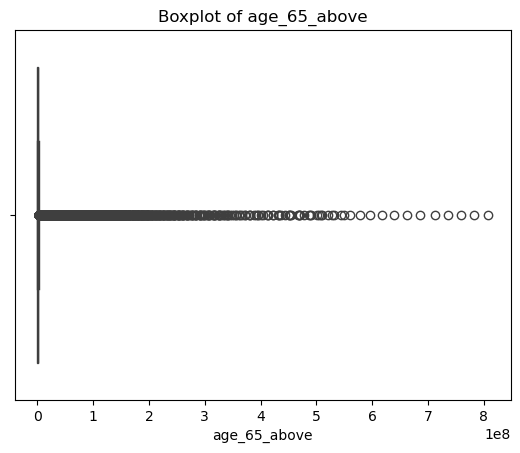

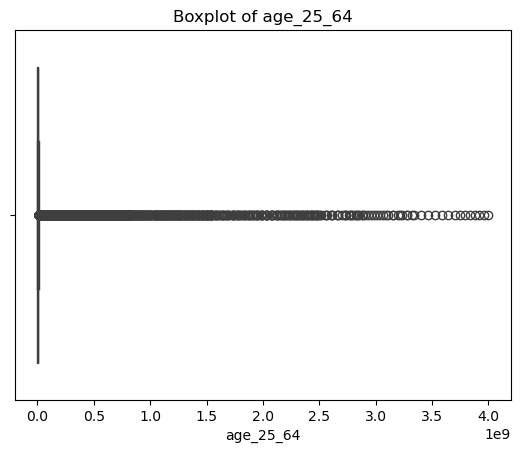

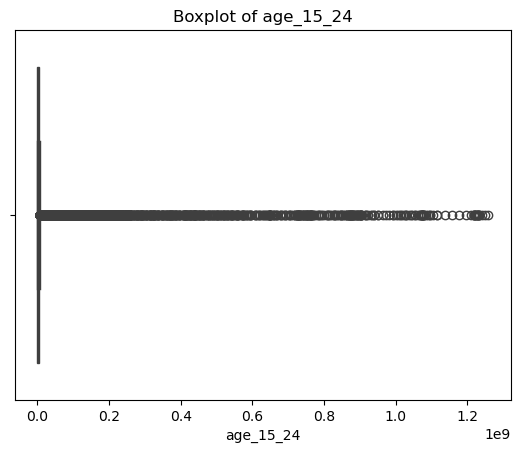

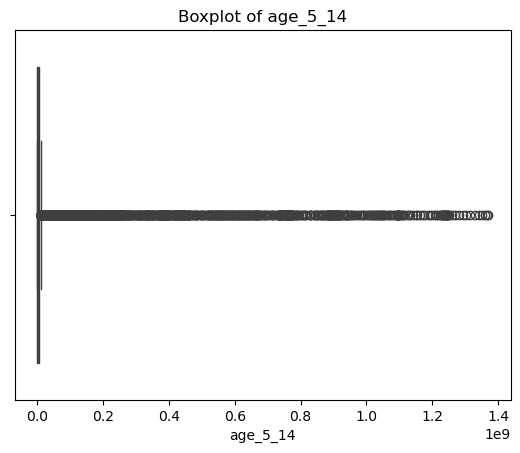

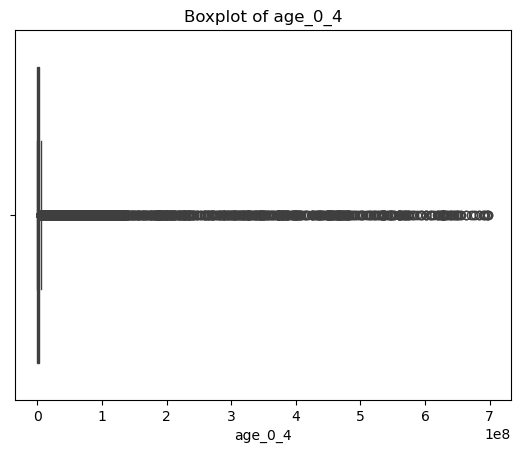

In [25]:
cols = ['age_65_above', 'age_25_64', 'age_15_24', 'age_5_14', 'age_0_4']
for i in cols:
    sns.boxplot(data=df, x=i, fill=True)
    plt.xlabel(i)
    plt.title(f'Boxplot of {i}')
    plt.show()

There are obvious outliers in each of the age groups. Further analysis needs to be taken to check the source of the outliers. 

### Feature Analysis

In [28]:
df.columns

Index(['Entity', 'Code', 'Year', 'age_65_above', 'age_25_64', 'age_15_24',
       'age_5_14', 'age_0_4'],
      dtype='object')

In [29]:
df['Entity'].unique()

array(['Afghanistan', 'Africa (UN)', 'Albania', 'Algeria',
       'American Samoa', 'Americas (UN)', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia (UN)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salva

Looking into the countries listed in the ``Entity`` column, there are collective group names of countries by their development, economic status, and continent. They should be separated since it totals the numbers from the countries in the list already. By continent, these are ``Africa``, ``Americas``, ``Asia``, and ``Europe``. By economic status, these are ``High Income Countries``, ``Low-income Countries``, ``Lower-Middle-Income Countries``, ``Upper-Middle-Income Countries``. By economic development, these are ``Land-locked developing countries (LLDC)``, ``Least developed countries``, ``Less developed regions``, ``Less developed regions, excluding China``, ``Less developed regions, excluding least developed countries``, ``More developed regions``, ``Small island developing states (SIDS)``, ``Upper-middle-income countries``. There is also a variable named 'World' that might contain the total number of population of all countries. Further analysis needs to be taken. This might be causing outliers. 

#### Analyzing the variable 'World' 

In [32]:
df_world = df.query('Entity == "World"')

In [33]:
df_world.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,74,1986-07-02 12:00:00,1950-01-01 00:00:00,1968-04-01 12:00:00,1986-07-02 12:00:00,2004-10-01 12:00:00,2023-01-01 00:00:00,NaN
age_65_above,74.0,347305681.756757,126304079.0,185557114.0,294433720.0,475205318.0,808366295.0,189203137.420217
age_25_64,74.0,2252867373.0,1042159233.0,1402942017.25,2052851651.0,3025179237.25,3999849831.0,936077315.912299
age_15_24,74.0,899531505.202703,456882503.0,625048569.0,972947706.5,1190742828.0,1258386223.0,280181887.337896
age_5_14,74.0,1029933774.918919,524379298.0,833097207.5,1067931874.5,1241690115.25,1370554417.0,253145974.49381
age_0_4,74.0,573998932.540541,343353095.0,517099135.5,615672431.0,648480718.25,697928077.0,98620715.753181


In [34]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,18944,1986-07-02 12:00:00,1950-01-01 00:00:00,1968-01-01 00:00:00,1986-07-02 12:00:00,2005-01-01 00:00:00,2023-01-01 00:00:00,NaN
age_65_above,18944.0,8358427.42045,31.0,13838.5,180428.5,996865.0,808366295.0,40469408.596327
age_25_64,18944.0,56842637.585093,216.0,113733.25,1558045.0,6627038.5,3999849831.0,269417201.786606
age_15_24,18944.0,23330176.996147,28.0,49200.25,656032.5,3183578.25,1258386223.0,108089174.390131
age_5_14,18944.0,26991655.868138,20.0,56559.0,756567.0,3868055.75,1370554417.0,122972001.430376
age_0_4,18944.0,15152242.698163,10.0,31164.75,423810.0,2224975.25,697928077.0,67943658.235817


Comparing with the overall dataset, the variable ``world`` contains the total number of populations of the countries. Thus, it needs to be separated from the list of countries. The same with the other collective names of countries. 

#### Continent Grouping

In [37]:
df_continent = df[df['Entity'].isin(['Africa (UN)', 'Americas (UN)', 'Asia (UN)', 'Europe (UN)', 
                                     'Latin America and the Caribbean (UN)', 'Northern America (UN)',
                                     'Oceania (UN)'])]

In [38]:
df_continent.shape

(518, 8)

In [39]:
df_continent['Entity'].unique()

array(['Africa (UN)', 'Americas (UN)', 'Asia (UN)', 'Europe (UN)',
       'Latin America and the Caribbean (UN)', 'Northern America (UN)',
       'Oceania (UN)'], dtype=object)

#### Economic Status Grouping

In [41]:
df_econ = df[df['Entity'].isin(['High-income countries', 'Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries'])]

In [42]:
df_econ.shape

(296, 8)

In [43]:
df_econ['Entity'].unique()

array(['High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'Upper-middle-income countries'],
      dtype=object)

#### Economic Development Grouping

In [45]:
df_dev = df[df['Entity'].isin(['Land-locked developing countries (LLDC)',
       'Least developed countries', 'Less developed regions', 'Less developed regions, excluding China', 
       'Less developed regions, excluding least developed countries', 'More developed regions', 'Small island developing states (SIDS)'])]

In [46]:
df_dev.shape

(518, 8)

In [47]:
df_dev['Entity'].unique()

array(['Land-locked developing countries (LLDC)',
       'Least developed countries', 'Less developed regions',
       'Less developed regions, excluding China',
       'Less developed regions, excluding least developed countries',
       'More developed regions', 'Small island developing states (SIDS)'],
      dtype=object)

In [48]:
df_dev.sample(5)

,Entity,Code,Year,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4
8871,Land-locked developing countries (LLDC),NaN,2015-01-01,16675937,174079900,95869486,122540713,72930054
9523,"Less developed regions, excluding least develo...",NaN,2001-01-01,238331189,1953400299,814242238,915376362,449138647
11526,More developed regions,NaN,2006-01-01,188124224,660141906,164737276,137602385,66300294
11483,More developed regions,NaN,1963-01-01,82558123,455025024,143626087,173867007,89790500
9542,"Less developed regions, excluding least develo...",NaN,2020-01-01,451935734,2797605305,872152128,936992189,459920294


It is now observed that the null values from the ``Code`` column are from region aggregates and collective names which is now an obvious observation. 

#### Dropping the groupings from the main dataset using the index method

In [51]:
#copying dataset
df_copy = df.copy()

In [52]:
df.shape

(18944, 8)

In [53]:
world = df_world.index

In [54]:
df.drop(world, inplace=True)

In [55]:
df.query('Entity == "World"')

,Entity,Code,Year,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4


In [56]:
continent = df_continent.index

In [57]:
df.drop(continent, inplace=True)

In [58]:
econ = df_econ.index

In [59]:
df.drop(econ, inplace=True)

In [60]:
dev = df_dev.index

In [61]:
df.drop(dev, inplace=True)

In [62]:
df.shape

(17538, 8)

In [63]:
(17538/18944)*100

92.578125

Almost 92% of the total data were removed from the main dataset.

In [65]:
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [66]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,17538,1986-07-02 12:00:00,1950-01-01 00:00:00,1968-01-01 00:00:00,1986-07-02 12:00:00,2005-01-01 00:00:00,2023-01-01 00:00:00,NaN
age_65_above,17538.0,1465413.27563,31.0,11065.25,139270.0,645864.75,203619019.0,7031828.351841
age_25_64,17538.0,9505752.174307,216.0,85207.0,1237041.0,4654243.5,827727719.0,45429575.083115
age_15_24,17538.0,3795487.11495,28.0,39197.75,550335.5,2003723.75,258395274.0,17112517.104545
age_5_14,17538.0,4345707.657829,20.0,46547.5,621289.5,2521546.0,261710556.0,18787525.15905
age_0_4,17538.0,2421934.190273,10.0,25828.0,338375.5,1536464.75,138241032.0,10137692.359749


In [67]:
df_copy.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,18944,1986-07-02 12:00:00,1950-01-01 00:00:00,1968-01-01 00:00:00,1986-07-02 12:00:00,2005-01-01 00:00:00,2023-01-01 00:00:00,NaN
age_65_above,18944.0,8358427.42045,31.0,13838.5,180428.5,996865.0,808366295.0,40469408.596327
age_25_64,18944.0,56842637.585093,216.0,113733.25,1558045.0,6627038.5,3999849831.0,269417201.786606
age_15_24,18944.0,23330176.996147,28.0,49200.25,656032.5,3183578.25,1258386223.0,108089174.390131
age_5_14,18944.0,26991655.868138,20.0,56559.0,756567.0,3868055.75,1370554417.0,122972001.430376
age_0_4,18944.0,15152242.698163,10.0,31164.75,423810.0,2224975.25,697928077.0,67943658.235817


There are still outliers in the new dataframe when all the groupings were removed. 

## Data Visualization

#### Population Over Time

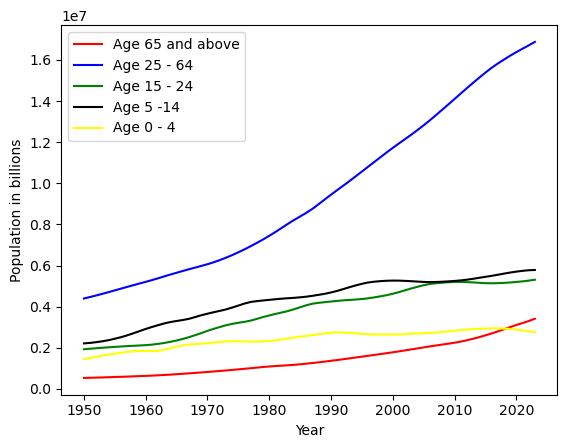

In [71]:
sns.lineplot(df, x='Year', y='age_65_above', errorbar=None, color='red', label='Age 65 and above')
sns.lineplot(df, x='Year', y='age_25_64', errorbar=None, color='blue', label='Age 25 - 64')
sns.lineplot(df, x='Year', y='age_15_24', errorbar=None, color='green', label='Age 15 - 24')
sns.lineplot(df, x='Year', y='age_5_14', errorbar=None, color='black', label='Age 5 -14')
sns.lineplot(df, x='Year', y='age_0_4', errorbar=None, color='yellow', label='Age 0 - 4')
plt.ylabel('Population in billions')
plt.legend()
plt.show()

#### Insights:
<b>Dramatic growth in the working-age population (25–64)</b>
* The blue line shows by far the steepest rise. From ~0.45 billion in 1950 to ~1.68 billion in 2023. This indicates a “demographic dividend” phase in many regions where working-age groups outpaced dependent age groups. It explains much of the global economic expansion during the late 20th century.

<b>Declining fertility reflected in 0–4 group (yellow)</b>
* Notice the yellow line rises until around the late 1980s–early 1990s, then plateaus and even dips slightly after 2000. This reflects a global decline in birth rates — fewer children are being born relative to past decades.

<b>Youth (5–14 and 15–24) growth slows</b>
* Black (5–14) and green (15–24) both grow but flatten after 1990–2000. Indicates stabilization of younger cohorts — again pointing to lower fertility rates globally.

<b>Aging population (65+) rising rapidly</b>
* The red line starts very low (~0.05 billion in 1950) but accelerates steeply after 2000. This is the clearest sign of population ageing: longer life expectancy plus shrinking younger cohorts means a growing share of elderly.

<b>Dependency ratio is shifting</b>
* In the mid-20th century, the population pyramid was bottom-heavy (children far outnumbered elderly). By 2023, the elderly population is catching up with young children (0–4). This will strain pensions, healthcare systems, and labor markets if productivity doesn’t rise.

#### Implications & takeaways:

<b> Economic: Countries that once benefited from large working-age populations (demographic dividend) will face challenges as aging accelerates.
Social & policy: Rising elderly share requires stronger healthcare systems, retirement planning, and pension reforms.</b>

Regional outlook: Developed regions (Europe, Japan, North America) already feel the effects of ageing. Developing regions (especially Africa, South Asia) still have relatively youthful populations but will follow this trend later.

<b>In short: the chart visualizes the transition from high fertility and youthful populations (1950s) → working-age bulge (1970–2010) → rapid ageing (2020 onward).</b>

#### Average Population by geography

In [74]:
df_continent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 74 to 12949
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Entity        518 non-null    object        
 1   Code          0 non-null      object        
 2   Year          518 non-null    datetime64[ns]
 3   age_65_above  518 non-null    int64         
 4   age_25_64     518 non-null    int64         
 5   age_15_24     518 non-null    int64         
 6   age_5_14      518 non-null    int64         
 7   age_0_4       518 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 36.4+ KB


In [75]:
df_continent_average = df_continent.groupby(['Entity']).agg({'age_65_above':"mean", 'age_25_64':"mean", 'age_15_24':"mean", 'age_5_14':"mean", 'age_0_4':"mean"}).reset_index()

In [76]:
df_continent.describe()

,Year,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4
count,518,5.180000e+02,5.180000e+02,5.180000e+02,5.180000e+02,5.180000e+02
mean,1986-07-02 12:00:00,5.762919e+07,3.666265e+08,1.454362e+08,1.658591e+08,9.195709e+07
min,1950-01-01 00:00:00,9.022440e+05,5.895671e+06,2.002459e+06,2.243216e+06,1.538312e+06
25%,1968-01-01 00:00:00,1.356380e+07,1.033007e+08,4.457574e+07,4.474109e+07,2.196762e+07
50%,1986-07-02 12:00:00,3.541629e+07,2.106150e+08,9.184010e+07,9.969494e+07,5.260965e+07
75%,2005-01-01 00:00:00,7.137153e+07,3.949528e+08,1.391923e+08,1.533994e+08,7.772942e+07
max,2023-01-01 00:00:00,4.694044e+08,2.482091e+09,7.646254e+08,7.762644e+08,4.077146e+08
std,NaN,7.266501e+07,4.796291e+08,1.853116e+08,2.056679e+08,1.114673e+08


In [77]:
df_continent_average.describe()

,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,5.762919e+07,3.666265e+08,1.454362e+08,1.658591e+08,9.195709e+07
std,5.948647e+07,4.424524e+08,1.829971e+08,2.094326e+08,1.162914e+08
min,2.555129e+06,1.270342e+07,4.280585e+06,4.716590e+06,2.532970e+06
25%,2.254708e+07,1.567592e+08,5.926093e+07,6.554010e+07,3.392416e+07
50%,3.289345e+07,2.341752e+08,9.842315e+07,9.547938e+07,4.870447e+07
75%,7.339379e+07,3.348863e+08,1.242528e+08,1.529801e+08,9.049550e+07
max,1.760740e+08,1.336216e+09,5.483222e+08,6.237776e+08,3.436228e+08


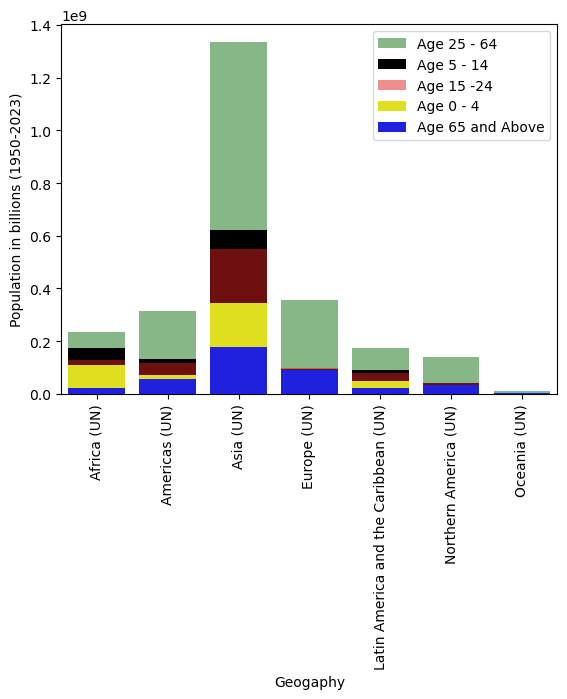

In [229]:
sns.barplot(df_continent_average, x='Entity', y='age_25_64', color='green', label='Age 25 - 64', alpha=0.5)
sns.barplot(df_continent_average, x='Entity', y='age_5_14', color='black', label='Age 5 - 14')
sns.barplot(df_continent_average, x='Entity', y='age_15_24', color='red', label='Age 15 -24', alpha=0.5)
sns.barplot(df_continent_average, x='Entity', y='age_0_4', color='yellow', label='Age 0 - 4')
sns.barplot(df_continent_average, x='Entity', y='age_65_above', color='blue', label='Age 65 and Above')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Population in billions (1950-2023)')
plt.xlabel('Geogaphy')
plt.show()

#### Insights:
<b>Asia dominates global population. With nearly 1.4 billion working-age people (25–64) alone, Asia dwarfs other regions. Asia’s total population is more than the combined total of Africa, Europe, and the Americas.</b>

* Africa’s youthful structure. Africa’s bar is smaller in absolute terms than Asia’s, but the yellow (0–4) and black (5–14) shares are visibly larger relative to its total population. This confirms Africa has the youngest population structure — high fertility and large child cohorts. Implication: Africa’s working-age population will surge in coming decades.

* Europe’s aging profile. Europe’s bar shows a significant blue segment (65+), proportionally larger than in Africa, Latin America, or Asia. This highlights Europe’s aging and low fertility, leading to slower or even negative population growth.

* Americas (split between North & Latin America). Combined, the Americas show moderate-sized populations, much smaller than Asia but larger than Africa today. North America has a relatively bigger 65+ (blue) segment, while Latin America has a younger profile.

* Oceania is marginal globally. Tiny population share, even smaller than North America’s elderly cohort.

<b>Broader implications</b>

Asia remains the population giant, but growth is slowing as fertility drops (esp. in East Asia). Africa is on track to be the main driver of global population growth this century. Europe & North America face aging populations — more elderly than youth, raising concerns about pensions, healthcare, and workforce shortages.

<b>Global economy outlook:</b>

Asia’s large working-age population has been a growth engine, but the aging trend will shift this advantage. Africa could become the next growth hub if education, jobs, and infrastructure keep up with its youth boom.

<b>In short: This chart shows the global demographic imbalance — Asia as the heavyweight, Africa as the rising youth powerhouse, and Europe/North America as aging regions.</b>

### Average Population by economic status

In [81]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 7104 to 18055
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Entity        296 non-null    object        
 1   Code          0 non-null      object        
 2   Year          296 non-null    datetime64[ns]
 3   age_65_above  296 non-null    int64         
 4   age_25_64     296 non-null    int64         
 5   age_15_24     296 non-null    int64         
 6   age_5_14      296 non-null    int64         
 7   age_0_4       296 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 20.8+ KB


In [82]:
df_econ_average = df_econ.groupby(['Entity']).agg({'age_65_above':"mean", 'age_25_64':"mean", 'age_15_24':"mean", 'age_5_14':"mean", 'age_0_4':"mean"}).reset_index()

In [83]:
df_econ_average

,Entity,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4
0,High-income countries,1.268900e+08,5.066896e+08,1.455712e+08,1.445311e+08,7.174961e+07
1,Low-income countries,9.836616e+06,1.074437e+08,6.236350e+07,8.589809e+07,5.561693e+07
2,Lower-middle-income countries,7.985988e+07,7.214190e+08,3.433001e+08,4.183083e+08,2.429447e+08
3,Upper-middle-income countries,1.297840e+08,9.095112e+08,3.446949e+08,3.768670e+08,2.013207e+08


In [84]:
df_econ_average.describe().T

,count,mean,std,min,25%,50%,75%,max
age_65_above,4.0,8.659263e+07,5.605411e+07,9.836616e+06,6.235406e+07,1.033750e+08,1.276135e+08,1.297840e+08
age_25_64,4.0,5.612659e+08,3.444110e+08,1.074437e+08,4.068782e+08,6.140543e+08,7.684420e+08,9.095112e+08
age_15_24,4.0,2.239824e+08,1.426852e+08,6.236350e+07,1.247693e+08,2.444356e+08,3.436488e+08,3.446949e+08
age_5_14,4.0,2.564011e+08,1.656423e+08,8.589809e+07,1.298728e+08,2.606990e+08,3.872273e+08,4.183083e+08
age_0_4,4.0,1.429080e+08,9.327849e+07,5.561693e+07,6.771644e+07,1.365352e+08,2.117267e+08,2.429447e+08


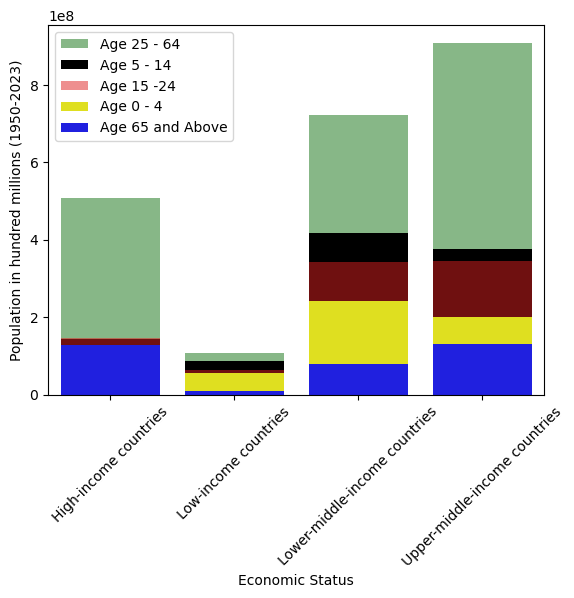

In [231]:
sns.barplot(df_econ_average, x='Entity', y='age_25_64', color='green', label='Age 25 - 64', alpha=0.5)
sns.barplot(df_econ_average, x='Entity', y='age_5_14', color='black', label='Age 5 - 14')
sns.barplot(df_econ_average, x='Entity', y='age_15_24', color='red', label='Age 15 -24', alpha=0.5)
sns.barplot(df_econ_average, x='Entity', y='age_0_4', color='yellow', label='Age 0 - 4')
sns.barplot(df_econ_average, x='Entity', y='age_65_above', color='blue', label='Age 65 and Above')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Population in hundred millions (1950-2023)')
plt.xlabel('Economic Status')
plt.show()

#### Insights

<b>Upper-middle-income countries dominate in population size.</b> The largest block overall, especially in the working-age (25–64) group. Suggests countries like China, Brazil, Russia, etc. drive much of this. Also, a sizable 65+ (blue) group is emerging, showing that many of these economies are now facing aging challenges.

<b>Lower-middle-income countries show strong youth bulge.</b> The yellow (0–4), black (5–14), and red (15–24) segments are very large relative to the total. Indicates countries in this category (e.g., India, Indonesia, Nigeria before recent classification shifts) have rapidly growing, young populations. This means a potential demographic dividend if job creation keeps pace.

<b>High-income countries are aging rapidly.</b>The blue segment (65+) is almost as large as the green (25–64). Youth groups (0–4, 5–14, 15–24) are very small. This confirms low fertility and aging population structures in developed economies like the US, Japan, and Western Europe.

<b>Low-income countries are small in total population but very young. </b> Tiny total population compared to other groups. Proportionally, however, children (0–14) make up a huge share.

Suggests future growth potential, but also challenges in terms of healthcare, education, and employment.

Comparative Breakdown
* Youth share (0–24): Highest in low-income and lower-middle-income countries. Lowest in high-income countries.
* Working-age (25–64): Largest absolute number in upper-middle-income countries.
* Proportionally, high-income countries are still strong in this category but shrinking.
* Elderly (65+): Most concentrated in high-income countries. Growing significantly in upper-middle-income countries, signaling upcoming aging challenges.

### Actionable Takeaways

Policy implications:

* Low & lower-middle-income countries: Need heavy investment in education, healthcare, and job creation to harness demographic dividends.
* High-income countries: Must prepare for aging — pension reforms, healthcare restructuring, and labor market innovation (immigration, automation).
* Upper-middle-income countries: In transition — both managing aging while still having some youth bulge.

Economic implications:

* Consumer markets will expand fastest in lower-middle-income regions.
* Healthcare and elderly care industries will boom in high- and upper-middle-income countries.
* Labor force availability will increasingly come from Africa and South Asia (mostly lower-middle- and low-income groups).

<b>In short: </b>
* High-income = aging challenge
* Upper-middle-income = demographic transition
* Lower-middle-income = youth-driven growth engine
* Low-income = small but fast-growing, very young base

### Average Population by Economic Development

In [88]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 8806 to 15687
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Entity        518 non-null    object        
 1   Code          0 non-null      object        
 2   Year          518 non-null    datetime64[ns]
 3   age_65_above  518 non-null    int64         
 4   age_25_64     518 non-null    int64         
 5   age_15_24     518 non-null    int64         
 6   age_5_14      518 non-null    int64         
 7   age_0_4       518 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 36.4+ KB


In [89]:
df_dev_average = df_dev.groupby(['Entity']).agg({'age_65_above':"mean", 'age_25_64':"mean", 'age_15_24':"mean", 'age_5_14':"mean", 'age_0_4':"mean"}).reset_index()

In [90]:
df_dev_average.describe().T

,count,mean,std,min,25%,50%,75%,max
age_65_above,7.0,9.933914e+07,8.711508e+07,2.821433e+06,1.388610e+07,1.307476e+08,1.647211e+08,2.045906e+08
age_25_64,7.0,7.477908e+08,6.983469e+08,2.012563e+07,1.442054e+08,5.645103e+08,1.336566e+09,1.688357e+09
age_15_24,7.0,3.227829e+08,3.084725e+08,8.765932e+06,8.013111e+07,1.588923e+08,5.954603e+08,7.406392e+08
age_5_14,7.0,3.804827e+08,3.641491e+08,1.007876e+07,1.068574e+08,1.557041e+08,7.048258e+08,8.742296e+08
age_0_4,7.0,2.165207e+08,2.067670e+08,5.561664e+06,6.078587e+07,8.954475e+07,4.008317e+08,4.973036e+08


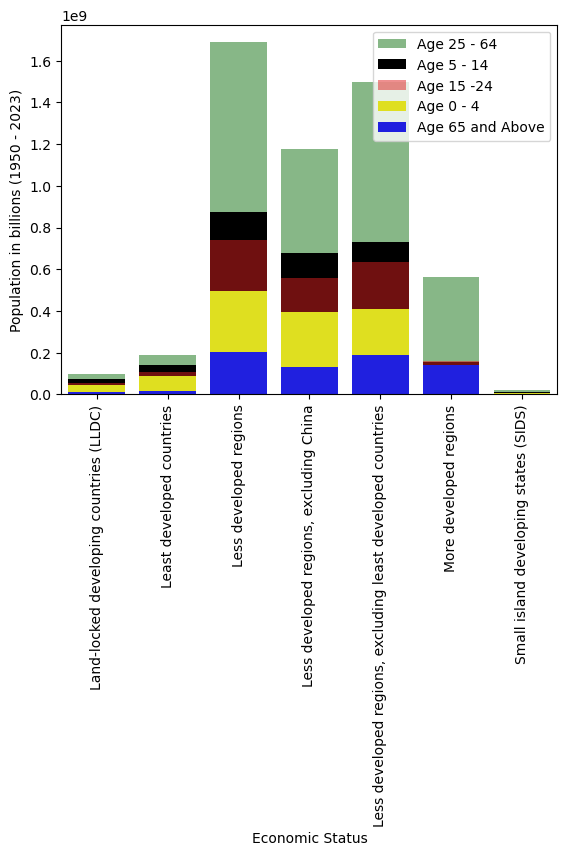

In [233]:
sns.barplot(df_dev_average, x='Entity', y='age_25_64', color='green', label='Age 25 - 64', alpha=0.5)
sns.barplot(df_dev_average, x='Entity', y='age_5_14', color='black', label='Age 5 - 14')
sns.barplot(df_dev_average, x='Entity', y='age_15_24', color='red', label='Age 15 -24', alpha=0.5)
sns.barplot(df_dev_average, x='Entity', y='age_0_4', color='yellow', label='Age 0 - 4')
sns.barplot(df_dev_average, x='Entity', y='age_65_above', color='blue', label='Age 65 and Above')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Population in billions (1950 - 2023)')
plt.xlabel('Economic Status')
plt.show()

#### Insights

<b>Less developed regions dominate global population.</b> They account for the largest population share (over 1.6 billion). Within this group, the working-age population (25–64) is the biggest segment, but the youth bulge (0–24) is still very prominent. This signals strong population growth momentum and potential economic expansion if employment opportunities match. China drives a big portion of less developed regions. The chart separates “Less developed regions excluding China,” and this is still very large (~1.2 billion). This indicates that while China has been a massive driver of population size, the rest of Asia and Africa together remain highly significant.

<b>Least developed countries (LDCs) show high fertility.</b>Their stacked bars have a large share of children (0–14) compared to working-age adults. This reflects high birth rates and low aging, suggesting rapid population growth and a very young demographic profile.

<b>Landlocked developing countries (LLDCs) and SIDS are small but vulnerable.</b> Both groups represent relatively tiny populations globally. However, LLDCs show a very youthful distribution, meaning they will continue to grow rapidly.

<b>SIDS (Small Island Developing States) show minimal numbers, but their demographic challenges lie more in climate vulnerability than size.</b>

<b>More developed regions are aging rapidly.</b> Their total population is much smaller (~700 million) compared to less developed regions. The 65+ group (blue) is significantly larger in proportion compared to LDCs and less developed regions. Children (0–14) form a very small segment, reflecting low fertility and shrinking youth populations.

<b>Comparative Breakdown</b>
* Youth-heavy populations (0–24): Strongest in LDCs and LLDCs, weaker in more developed regions.
* Working-age dominance (25–64): Highest in less developed regions (with & without China). More balanced in developed regions but shrinking in relative share.
* Elderly (65+): Highest in more developed regions. Almost negligible in LDCs and LLDCs.

#### Actionable Insights

For developed regions: Urgent need to address aging population issues: healthcare, pensions, and labor shortages. Likely to rely more on immigration from less developed countries.

For less developed & least developed regions: Huge opportunity for demographic dividend with such a large youth base. Requires investments in education, skills, healthcare, and job creation. Otherwise, risks of unemployment and instability rise.

For LLDCs and SIDS: Small but fast-growing youth populations (LLDCs) or vulnerable, small populations (SIDS). Policy focus should be on resilience, economic diversification, and sustainable development.

<b>In summary:</b>
* More developed = aging & shrinking youth.
* Less developed = still dominant, with China historically huge but others catching up.
* Least developed = very youthful, fastest-growing.
* LLDCs & SIDS = small in absolute numbers, but with unique vulnerabilities.

### Population By Country

In [94]:
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [95]:
df['pop_total'] = df['age_65_above'] + df['age_25_64'] + df['age_15_24'] + df['age_5_14'] + df['age_0_4'] 

In [96]:
df.sample(5)

,Entity,Code,Year,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4,pop_total
14342,Saint Helena,SHN,2010-01-01,969,2993,592,522,234,5310
3806,Cote d'Ivoire,CIV,1982-01-01,218335,2834256,1621611,2481157,1752508,8907867
11358,Montenegro,MNE,1986-01-01,45239,295930,106502,106589,52496,606756
18190,Uzbekistan,UZB,2010-01-01,1362128,12607513,6201578,5285155,2929051,28385425
2395,British Virgin Islands,VGB,1977-01-01,570,4234,2189,2418,1371,10782


In [97]:
pop_country = df.groupby(['Entity'])['pop_total'].sum().sort_values(ascending=False).reset_index()

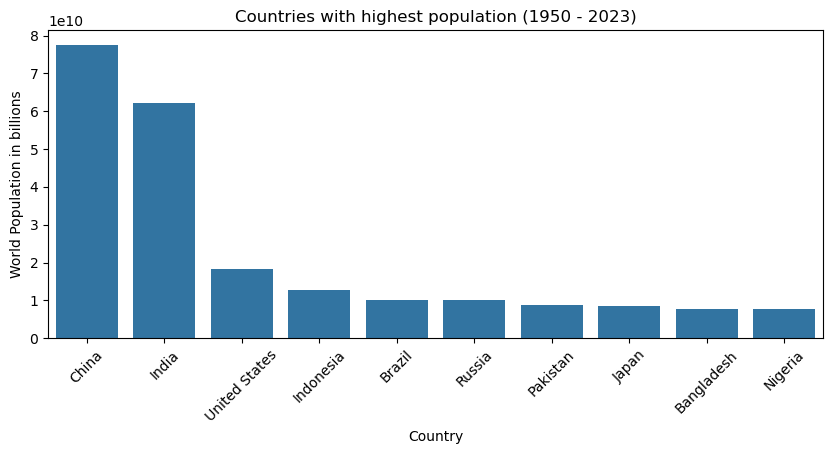

In [235]:
plt.figure(figsize=(10, 4))
sns.barplot(pop_country.head(10), x='Entity', y='pop_total', errorbar=None)
plt.ylabel('World Population in billions')
plt.xlabel('Country')
plt.title('Countries with highest population (1950 - 2023)')
plt.xticks(rotation=45)
plt.show()

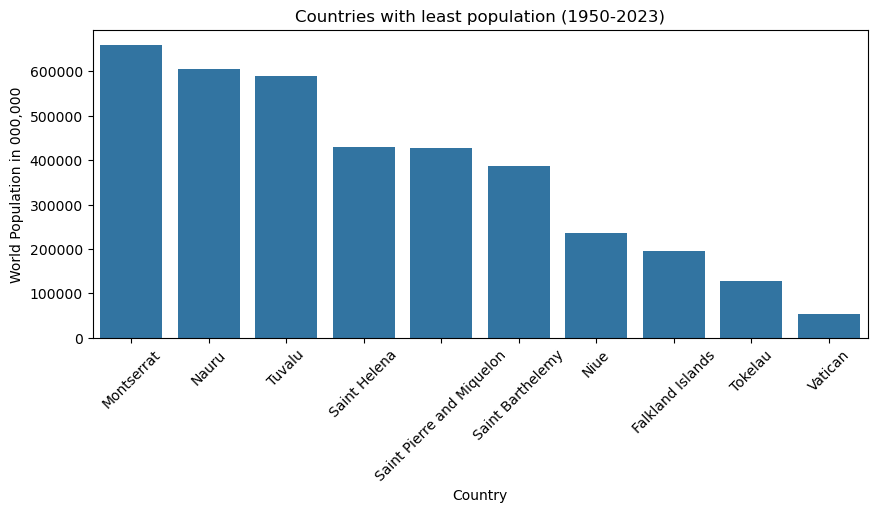

In [237]:
plt.figure(figsize=(10, 4))
sns.barplot(pop_country.tail(10), x='Entity', y='pop_total', errorbar=None)
plt.ylabel('World Population in 000,000')
plt.xlabel('Country')
plt.title('Countries with least population (1950-2023)')
plt.xticks(rotation=45)
plt.show()

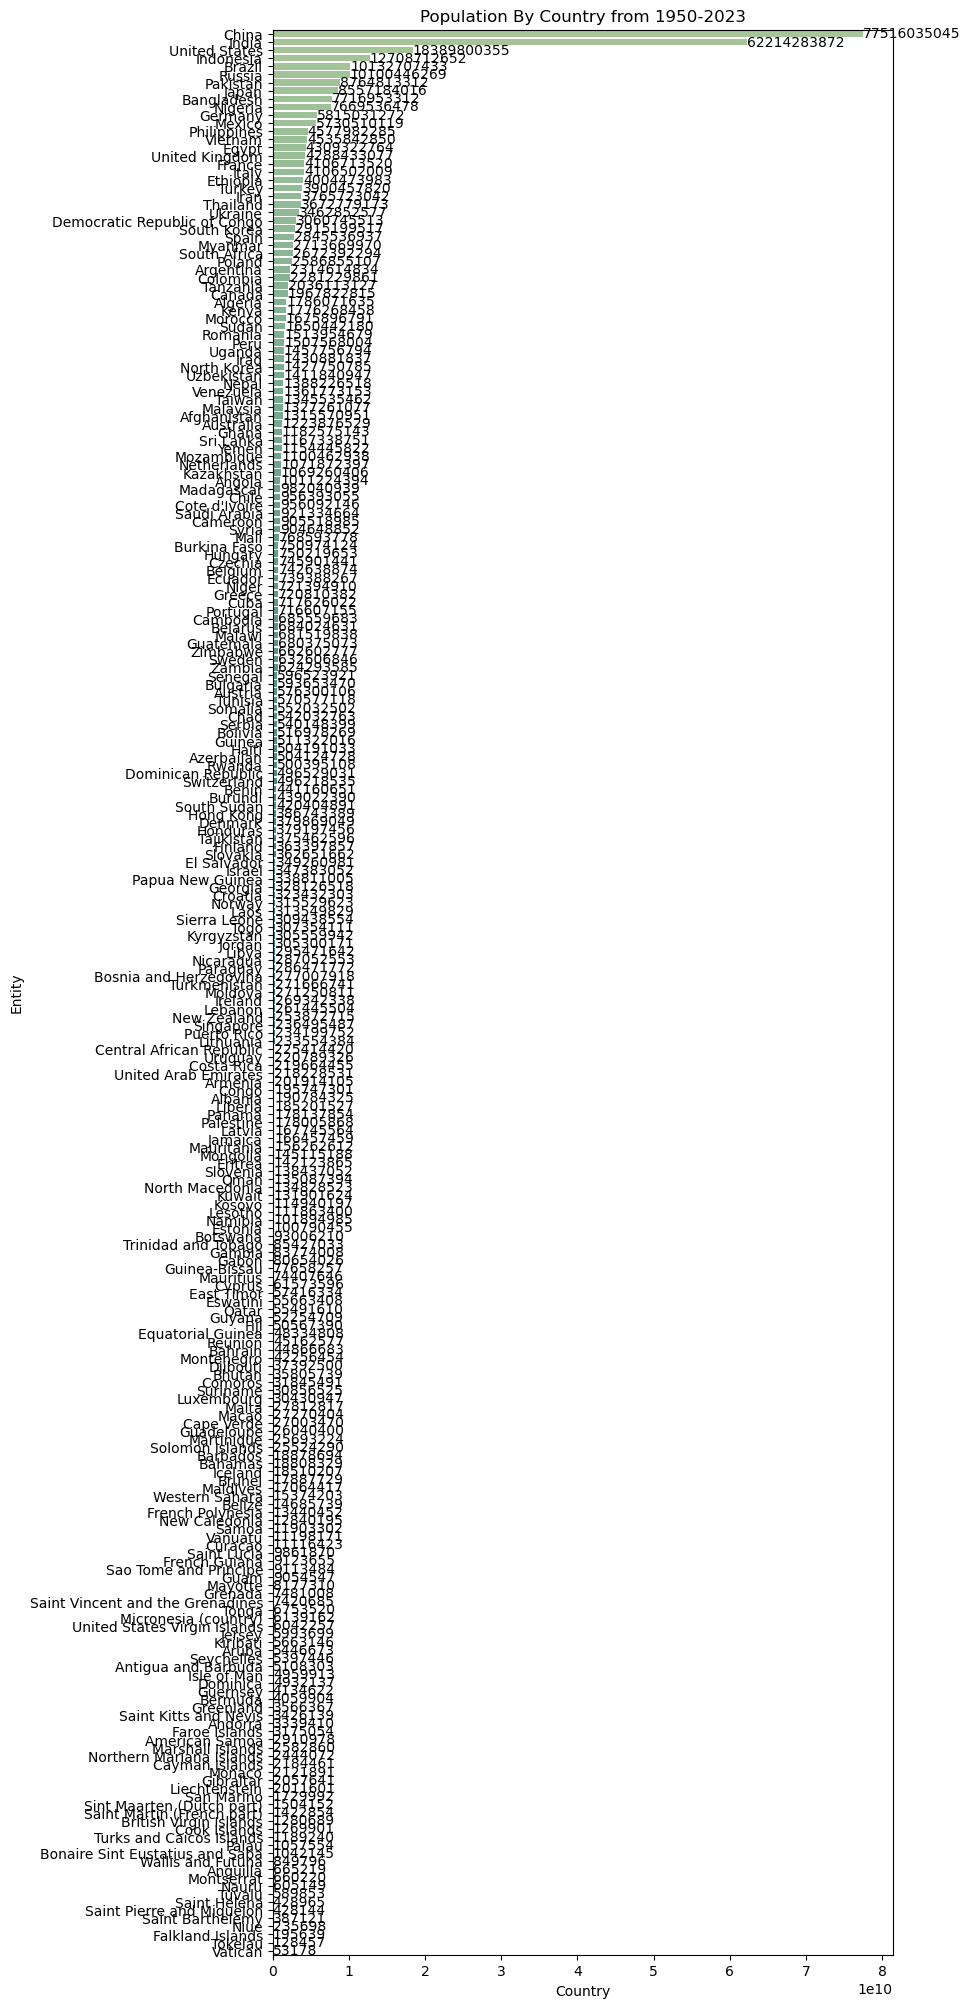

In [239]:
plt.figure(figsize=(8, 25))
ax = sns.barplot(pop_country, x='pop_total', y='Entity', palette='crest')
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge')
plt.xlabel('Country')
plt.title('Population By Country from 1950-2023')
plt.show()

In [215]:
print(f' Age 65 and above: {df['age_65_above'].sum()}')
print(f' Age 25 - 64: {df['age_25_64'].sum()}')
print(f' Age 15 - 24: {df['age_15_24'].sum()}')
print(f' Age 5 - 14: {df['age_5_14'].sum()}')
print(f' Age 0 - 4: {df['age_0_4'].sum()}')

 Age 65 and above: 25700418028
 Age 25 - 64: 166711881633
 Age 15 - 24: 66565253022
 Age 5 - 14: 76215020903
 Age 0 - 4: 42475881829


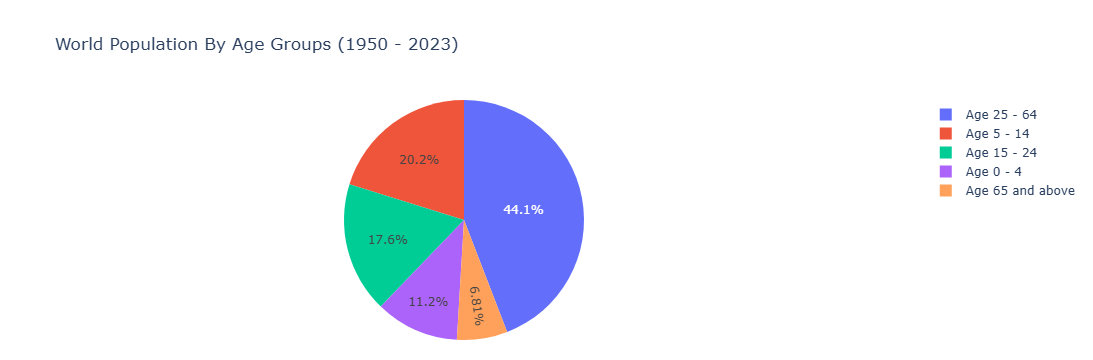

In [245]:
#df_2017.loc[df_2017['Count'] < 1.e8, 'Country Name'] = 'Other Countries' 
fig = px.pie(df, values=[25700418028, 166711881633, 66565253022,76215020903, 42475881829], names=['Age 65 and above', 'Age 25 - 64', 
                                                                                                             'Age 15 - 24', 'Age 5 - 14',
                                                                                                             'Age 0 - 4'], title='World Population By Age Groups (1950 - 2023)')

fig.update_layout(
    margin=dict(l=20, r=20,  b=20))

fig.show();

#### Insights:

<b>Largest Share: Working-Age Population (25–64 years)</b>

At 44.1%, this is the largest segment of the world’s population. This indicates that nearly half of the global population is of working age, which has major implications for global labor supply, productivity, and economic growth.

<b>Children and Youth (0–24 years)</b>

Combined, the 0–4 (11.2%), 5–14 (20.2%), and 15–24 (17.6%) groups make up ~49% of the population. This means nearly half of the world is under 25 years old, showing a youthful global demographic. However, compared to the 1950s, the proportion of younger age groups has been gradually shrinking due to declining fertility rates worldwide.

<b>Elderly Population (65+ years)</b>

At 6.8%, this group is still the smallest, but it’s the fastest-growing age group globally. Population aging is particularly pronounced in developed countries (e.g., Japan, EU nations), where it’s straining healthcare, pensions, and social support systems.

In developing regions, while the elderly population is smaller, it is growing steadily as life expectancy increases.

#### Implications:

* Demographic Dividend Potential: With 44.1% of the population in the 25–64 bracket, countries with strong economic policies can capitalize on a large labor force to boost growth. This is evident in emerging economies like India and parts of Africa.

* Youth Bulge in Developing Nations: The fact that nearly half the global population is under 25 can be both an opportunity (innovation, labor force expansion) and a challenge (unemployment, education, political instability if opportunities are limited).

* Global Aging Trend: Although only 6.8% now, the share of 65+ will continue rising. By 2050, the UN projects it may reach ~16%, meaning 1 in 6 people will be elderly. This will shift healthcare priorities, create demand for elder care industries, and reshape workforce dynamics.

* Shift in Dependency Ratios: The high proportion of working-age people relative to children and the elderly is favorable today, but as the 25–64 group ages, the dependency ratio will rise, creating challenges for sustaining pensions and welfare systems.

#### Summary:
The chart reflects a youthful but gradually aging world. While most people are of working age (44.1%), the next few decades will see a rise in the elderly share, a relative decline in younger groups, and the need for countries to adapt policies in education, employment, healthcare, and social security to maintain balanced and sustainable growth.

### Compound Annual Growth Rate (CAGR)

In [250]:
start_year = 1950
end_year = 2023
years = end_year - start_year

In [252]:
df.query('Year == 1950')

,Entity,Code,Year,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4,pop_total
0,Afghanistan,AFG,1950-01-01,221568,2881732,1481160,1891644,1300029,7776133
148,Albania,ALB,1950-01-01,74856,456890,228878,300425,186742,1247791
222,Algeria,DZA,1950-01-01,313744,3265887,1775955,2193221,1469319,9018126
296,American Samoa,ASM,1950-01-01,441,5947,3823,5268,3546,19025
444,Andorra,AND,1950-01-01,594,3022,976,887,500,5979
...,...,...,...,...,...,...,...,...,...
18500,Wallis and Futuna,WLF,1950-01-01,146,2502,1688,2504,1676,8516
18574,Western Sahara,ESH,1950-01-01,359,4765,2425,3238,2148,12935
18722,Yemen,YEM,1950-01-01,183679,1652984,870598,1141388,768071,4616720
18796,Zambia,ZMB,1950-01-01,64226,774757,442953,612165,427148,2321249


In [254]:
df['Year1'] = pd.to_datetime(df['Year']).dt.year

In [256]:
df_start_year1 = df[df['Year1'] == 1950]
df_start_year1

,Entity,Code,Year,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4,pop_total,Year1
0,Afghanistan,AFG,1950-01-01,221568,2881732,1481160,1891644,1300029,7776133,1950
148,Albania,ALB,1950-01-01,74856,456890,228878,300425,186742,1247791,1950
222,Algeria,DZA,1950-01-01,313744,3265887,1775955,2193221,1469319,9018126,1950
296,American Samoa,ASM,1950-01-01,441,5947,3823,5268,3546,19025,1950
444,Andorra,AND,1950-01-01,594,3022,976,887,500,5979,1950
...,...,...,...,...,...,...,...,...,...,...
18500,Wallis and Futuna,WLF,1950-01-01,146,2502,1688,2504,1676,8516,1950
18574,Western Sahara,ESH,1950-01-01,359,4765,2425,3238,2148,12935,1950
18722,Yemen,YEM,1950-01-01,183679,1652984,870598,1141388,768071,4616720,1950
18796,Zambia,ZMB,1950-01-01,64226,774757,442953,612165,427148,2321249,1950


In [258]:
df['Year'].max()

Timestamp('2023-01-01 00:00:00')

In [260]:
df_end_year = df[df['Year1'] == 2023]
df_end_year

,Entity,Code,Year,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4,pop_total,Year1
73,Afghanistan,AFG,2023-01-01,985572,13708991,8840817,11263133,6656177,41454690,2023
221,Albania,ALB,2023-01-01,458156,1503121,370992,334082,145072,2811423,2023
295,Algeria,DZA,2023-01-01,2943406,22762890,6313062,9391267,4753144,46163769,2023
369,American Samoa,ASM,2023-01-01,3579,22490,8360,9215,3855,47499,2023
517,Andorra,AND,2023-01-01,12444,49580,8883,7489,2415,80811,2023
...,...,...,...,...,...,...,...,...,...,...
18573,Wallis and Futuna,WLF,2023-01-01,1594,5583,1764,1856,563,11360,2023
18647,Western Sahara,ESH,2023-01-01,36717,326656,80758,90199,45349,579679,2023
18795,Yemen,YEM,2023-01-01,987712,14506044,7657697,9945015,6294275,39390743,2023
18869,Zambia,ZMB,2023-01-01,393475,7366657,4269001,5543088,3151670,20723891,2023


In [262]:
df_end_yr = df_end_year[['Entity', 'Code', 'pop_total', 'Year1']]
df_end_yr

,Entity,Code,pop_total,Year1
73,Afghanistan,AFG,41454690,2023
221,Albania,ALB,2811423,2023
295,Algeria,DZA,46163769,2023
369,American Samoa,ASM,47499,2023
517,Andorra,AND,80811,2023
...,...,...,...,...
18573,Wallis and Futuna,WLF,11360,2023
18647,Western Sahara,ESH,579679,2023
18795,Yemen,YEM,39390743,2023
18869,Zambia,ZMB,20723891,2023


In [264]:
df_start_year_final = df_start_year1[['Entity', 'Code', 'pop_total', 'Year1']]
df_start_year_final

,Entity,Code,pop_total,Year1
0,Afghanistan,AFG,7776133,1950
148,Albania,ALB,1247791,1950
222,Algeria,DZA,9018126,1950
296,American Samoa,ASM,19025,1950
444,Andorra,AND,5979,1950
...,...,...,...,...
18500,Wallis and Futuna,WLF,8516,1950
18574,Western Sahara,ESH,12935,1950
18722,Yemen,YEM,4616720,1950
18796,Zambia,ZMB,2321249,1950


In [266]:
df_start_year_final.rename(columns={'pop_total': 'pop_start', 'Year1': 'start_year'}, inplace=True)

In [268]:
df_start_year_final

,Entity,Code,pop_start,start_year
0,Afghanistan,AFG,7776133,1950
148,Albania,ALB,1247791,1950
222,Algeria,DZA,9018126,1950
296,American Samoa,ASM,19025,1950
444,Andorra,AND,5979,1950
...,...,...,...,...
18500,Wallis and Futuna,WLF,8516,1950
18574,Western Sahara,ESH,12935,1950
18722,Yemen,YEM,4616720,1950
18796,Zambia,ZMB,2321249,1950


In [270]:
df_end_year

,Entity,Code,Year,age_65_above,age_25_64,age_15_24,age_5_14,age_0_4,pop_total,Year1
73,Afghanistan,AFG,2023-01-01,985572,13708991,8840817,11263133,6656177,41454690,2023
221,Albania,ALB,2023-01-01,458156,1503121,370992,334082,145072,2811423,2023
295,Algeria,DZA,2023-01-01,2943406,22762890,6313062,9391267,4753144,46163769,2023
369,American Samoa,ASM,2023-01-01,3579,22490,8360,9215,3855,47499,2023
517,Andorra,AND,2023-01-01,12444,49580,8883,7489,2415,80811,2023
...,...,...,...,...,...,...,...,...,...,...
18573,Wallis and Futuna,WLF,2023-01-01,1594,5583,1764,1856,563,11360,2023
18647,Western Sahara,ESH,2023-01-01,36717,326656,80758,90199,45349,579679,2023
18795,Yemen,YEM,2023-01-01,987712,14506044,7657697,9945015,6294275,39390743,2023
18869,Zambia,ZMB,2023-01-01,393475,7366657,4269001,5543088,3151670,20723891,2023


In [272]:
df_end_year_final1 = df_end_yr[['Entity', 'pop_total', 'Year1']]
df_end_year_final1

,Entity,pop_total,Year1
73,Afghanistan,41454690,2023
221,Albania,2811423,2023
295,Algeria,46163769,2023
369,American Samoa,47499,2023
517,Andorra,80811,2023
...,...,...,...
18573,Wallis and Futuna,11360,2023
18647,Western Sahara,579679,2023
18795,Yemen,39390743,2023
18869,Zambia,20723891,2023


In [274]:
df_end_year_final1.rename(columns={'pop_total': 'pop_end', 'Year1': 'end_year'}, inplace=True)

In [276]:
df_end_year_final1

,Entity,pop_end,end_year
73,Afghanistan,41454690,2023
221,Albania,2811423,2023
295,Algeria,46163769,2023
369,American Samoa,47499,2023
517,Andorra,80811,2023
...,...,...,...
18573,Wallis and Futuna,11360,2023
18647,Western Sahara,579679,2023
18795,Yemen,39390743,2023
18869,Zambia,20723891,2023


In [278]:
merged_df_left = pd.merge(df_start_year_final, df_end_year_final1, on='Entity', how='left')

In [280]:
merged_df_left

,Entity,Code,pop_start,start_year,pop_end,end_year
0,Afghanistan,AFG,7776133,1950,41454690,2023
1,Albania,ALB,1247791,1950,2811423,2023
2,Algeria,DZA,9018126,1950,46163769,2023
3,American Samoa,ASM,19025,1950,47499,2023
4,Andorra,AND,5979,1950,80811,2023
...,...,...,...,...,...,...
232,Wallis and Futuna,WLF,8516,1950,11360,2023
233,Western Sahara,ESH,12935,1950,579679,2023
234,Yemen,YEM,4616720,1950,39390743,2023
235,Zambia,ZMB,2321249,1950,20723891,2023


In [282]:
merged_df_left['diff_years'] = merged_df_left['end_year'] - merged_df_left['start_year']

In [302]:
merged_df_left['CAGR'] = ((merged_df_left['pop_end'] / merged_df_left['pop_start']) ** (1 / (merged_df_left['end_year'] - merged_df_left['start_year'])) - 1)*100

In [304]:
merged_df_left

,Entity,Code,pop_start,start_year,pop_end,end_year,diff_years,CAGR
0,Afghanistan,AFG,7776133,1950,41454690,2023,73,2.319003
1,Albania,ALB,1247791,1950,2811423,2023,73,1.118976
2,Algeria,DZA,9018126,1950,46163769,2023,73,2.262137
3,American Samoa,ASM,19025,1950,47499,2023,73,1.261250
4,Andorra,AND,5979,1950,80811,2023,73,3.631309
...,...,...,...,...,...,...,...,...
232,Wallis and Futuna,WLF,8516,1950,11360,2023,73,0.395508
233,Western Sahara,ESH,12935,1950,579679,2023,73,5.347008
234,Yemen,YEM,4616720,1950,39390743,2023,73,2.980324
235,Zambia,ZMB,2321249,1950,20723891,2023,73,3.044298


In [323]:
df_cagr = merged_df_left.groupby(['Entity', 'pop_start', 'pop_end'])['CAGR'].mean().sort_values(ascending=False).reset_index()
df_cagr

,Entity,pop_start,pop_end,CAGR
0,United Arab Emirates,74489,10642046,7.033476
1,Qatar,24266,2979034,6.811373
2,Western Sahara,12935,579679,5.347008
3,Kuwait,153929,4838712,4.836486
4,Sint Maarten (Dutch part),1428,42734,4.765864
...,...,...,...,...
232,Cook Islands,14674,14198,-0.045163
233,Bulgaria,7248013,6795417,-0.088288
234,Vatican,856,489,-0.764063
235,Niue,4490,1809,-1.237591


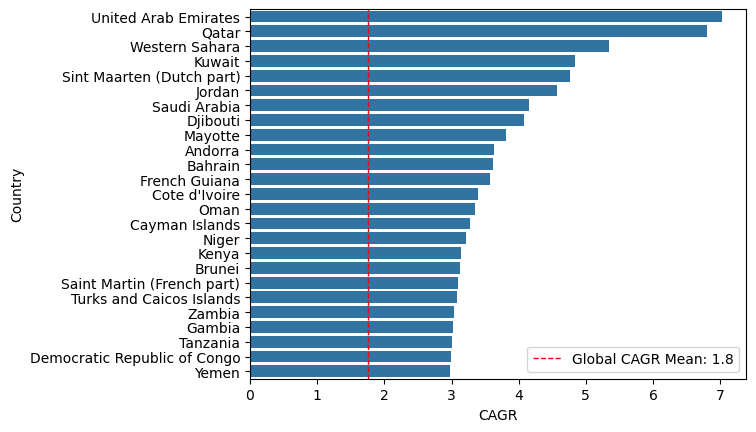

In [325]:
mean_score = df_cagr['CAGR'].mean()

sns.barplot(df_cagr[:25], x='CAGR', y='Entity')
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Global CAGR Mean: {mean_score:.1f}')
plt.legend()
plt.ylabel('Country')
plt.show()

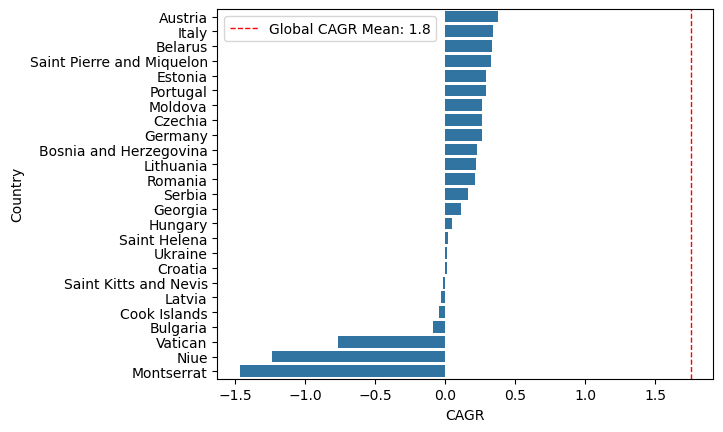

In [330]:
sns.barplot(df_cagr[-25:], x='CAGR', y='Entity')
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Global CAGR Mean: {mean_score:.1f}')
plt.legend()
plt.ylabel('Country')
plt.show()

<b>Compounded Annual Growth Rate (CAGR)</b> is the rate at which something grows every year on average over a certain time period, assuming the growth was compounded.

The formula is:

𝐶𝐴𝐺𝑅 = (Ending Value/Starting Value)1𝑛−1

Where: 
* Ending Value = the value at the end of the period
* Starting Value = the value at the beginning of the period
* n = number of years

It smooths out fluctuations and gives a single consistent growth rate per year.

>As the chart above shows, UAE has a 7% population growth rate over such a long period is extraordinarily high. Even high-growth countries often average 2–3%. 

So, 7% CAGR suggests:
* Massive in-migration of workers (expats, labor force influx).
* Economic transformation (oil discovery in the 1960s, rapid urbanization, diversification).
* Policy-driven population expansion.

<b>In plain terms</b>
*  If UAE’s population was 74,489 in 1950, a 7% CAGR means it would double roughly every 10 years, reaching 10,642,046 today (which is indeed close to reality).

>On the other side, a territory called Montserrat has the lowest CAGR of -1.5%.

Instead of compounding upwards like UAE’s +7.0% growth, Montserrat’s curve compounded downwards, showing long-term decline. There is a depopulation trend in Montserrat with population today is smaller than in 1950. A –1.5% annual rate doesn’t sound huge, but compounded over 70+ years, it results in a dramatic decline.

Starting at 12,925 people in 1950 and after 73 years at –1.5% CAGR around 4,397 people today (a two-thirds decline).

<b>Possible Reasons for Population decline for Montserrat:</b>
* Natural disasters: The volcanic eruptions in the 1990s forced mass emigration.
* Emigration: Residents moved to the UK, US, and other Caribbean islands for safety and economic opportunities.
* Low birth rates compared to migration outflows.

#### Comparing CAGR of UAE and Montserrat
>UAE (+7.0% CAGR): Rapid growth, mainly from migration into the country, plus economic development.
>Montserrat (–1.5% CAGR): Steady decline, mainly from migration out of the country, driven by environmental and economic challenges.

<b>In plain terms:</b>
* UAE’s CAGR shows a country that multiplied its population many times over in just a few decades.
* Montserrat’s negative CAGR shows a country that has been shrinking steadily, ending up with a fraction of its starting population.

## In Focus: Philippines

In [371]:
df_phl = df.query('Entity == "Philippines"')

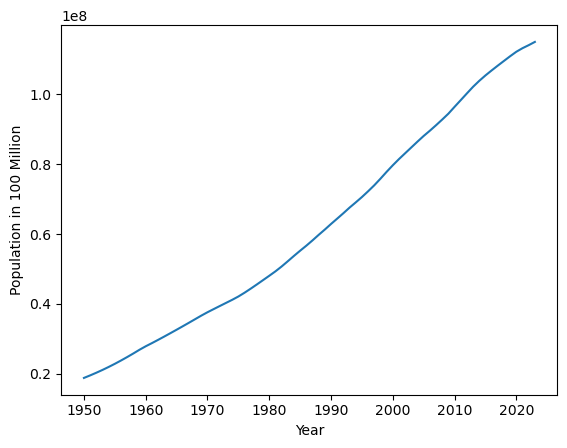

In [373]:
sns.lineplot(df_phl, x='Year', y='pop_total')
plt.ylabel('Population in 100 Million')
plt.xlabel('Year')
plt.show()

In [425]:
df_phl['pop_total'].max()

114890915

There is an upward trend of population in the Philippines starting with over 18 million in 1950 to over 114 million in 2023. 

#### Population in the Philippines by Age Group

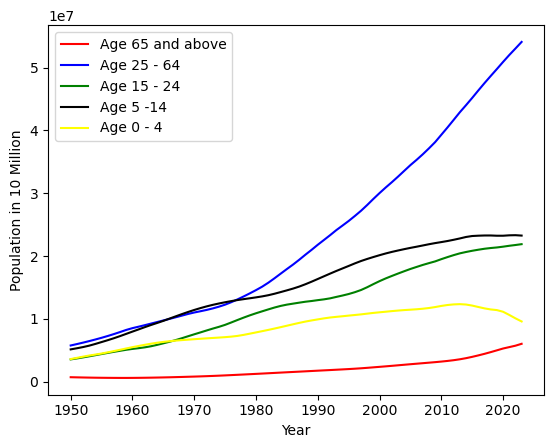

In [421]:
sns.lineplot(df_phl, x='Year', y='age_65_above', errorbar=None, color='red', label='Age 65 and above')
sns.lineplot(df_phl, x='Year', y='age_25_64', errorbar=None, color='blue', label='Age 25 - 64')
sns.lineplot(df_phl, x='Year', y='age_15_24', errorbar=None, color='green', label='Age 15 - 24')
sns.lineplot(df_phl, x='Year', y='age_5_14', errorbar=None, color='black', label='Age 5 -14')
sns.lineplot(df_phl, x='Year', y='age_0_4', errorbar=None, color='yellow', label='Age 0 - 4')
plt.ylabel('Population in 10 Million')
plt.legend()
plt.show()

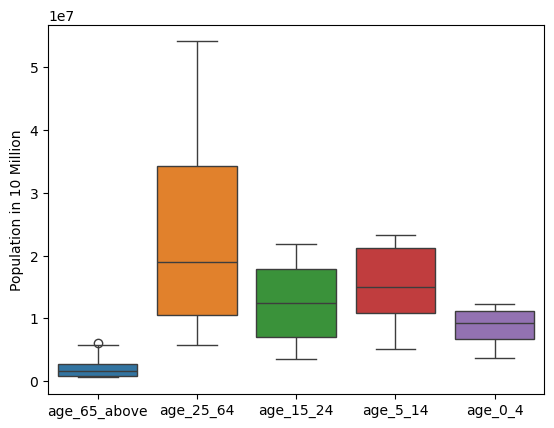

In [438]:
df_phl_col = df_phl[['age_65_above', 'age_25_64', 'age_15_24', 'age_5_14', 'age_0_4']]
sns.boxplot(df_phl_col)
plt.ylabel('Population in 10 Million')
plt.show()

In [471]:
df_cagr.query('Entity == "Philippines"')

,Entity,pop_start,pop_end,CAGR
55,Philippines,18849480,114890915,2.506932


#### Insights:

<b>Overall population growth</b>

Strong upward trend across all age groups since 1950. The Philippines has grown from a relatively small population to over 110 million by 2023.

> Working-age group (25–64, blue) dominates. This group has grown the most sharply since 1980, surpassing 20M by the mid-1980s and continuing past 50M today. Indicates the Philippines is in a demographic dividend window, with a large share of its people in productive ages.

* Youth groups (0–14, yellow & black) are plateauing
* Children (0–4, yellow): Rapid growth until ~1990s, but plateaued and even declined slightly after 2010. Suggests declining fertility rates in recent decades.
* Children (5–14, black): Steady growth until ~2010, then flattening. Another sign of slowing birth rates.
* Young adults (15–24, green) keep rising but slower. Still growing, but at a slower pace than the 25–64 group. Reflects a transitioning demographic: fewer children being born, but more youth moving into the workforce.
* Elderly (65+, red) increasing but still small. A clear rise after 2000. Still the smallest group, but its growth rate is accelerating, indicating the early stages of population aging.

<b>Big Picture Trends for the Philippines</b>
* 1950s–1980s: Youth-heavy population, wide-base pyramid.
* 1990s–2010s: Explosion of working-age population → demographic dividend begins.
* 2010s–2020s: Slowing child population growth, stabilizing fertility, and a gradually aging society.

#### Implications

Economic opportunities: Large, growing workforce can fuel productivity if paired with education, skills development, and job creation. This is the Philippines’ “demographic sweet spot”.

#### Challenges:

If jobs don’t keep pace, unemployment/underemployment among youth will remain high. Healthcare and pension systems need to prepare for the coming rise in elderly.

#### Population transition:

The country is shifting from a high-fertility, youth-heavy profile toward lower fertility and aging. Not yet at the aging levels of developed countries, but the signs are emerging.

#### CAGR of 2.5% 

The Philippines have a 2.5% annual growth rate which is near the global CAGR of 1.8%. This means that Philippines has a normal growth rate of its population. In 1950, Philippines has a population almost 19 million and after 70 years, it grew to 115 million. 	

### In summary:
The Philippines has moved from a youth-heavy society in 1950 to a workforce-heavy society in 2023, with fertility declining and aging beginning. The demographic dividend is at its peak, but policy decisions in the next decade will determine whether the country reaps its full benefit or faces economic strain.